# GIS with ![Python](./pics/python-logo.png) and ![IPython](./pics/IPy_header.png)

In [9]:
#!/usr/bin/env python
''' 
This program uses python to import our data on crops and hofstede etc to map it and export certain parts of it
author Omer Ozak ozak@smu.edu
'''
from __future__ import division
import numpy as np
import csv, os ,sys
import pandas as pd
from osgeo import gdal, gdalnumeric, ogr, osr
from gdalconst import *
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.path import Path
from matplotlib.collections import PolyCollection
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

# Determine drive
drv="/Users/bizcocho/Desktop"

# Our data
dir=os.getenv("HOME")+'/Dropbox/LatexMe/Isolation/'
'''
datafile=dir+'data/data.dta'
data=pd.read_stata(datafile)
'''
datafile=dir+'data/data.csv'
data=pd.read_csv(datafile,low_memory=False)
data['riv']=data.riv+100

# Country shape file
cntryshp=drv+'/Geographical_Index/GIS/cntry00/cntry00.shp'
cntry=ogr.Open(cntryshp)
cntrylyr=cntry.GetLayer()
xmin,xmax,ymin,ymax=cntrylyr.GetExtent()
cylproj=cntrylyr.GetSpatialRef()
cylstr=cylproj.ExportToProj4() # '+proj=cea +lon_0=0 +lat_ts=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs '

### PARAMETERS FOR MATPLOTLIB :
mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 4.
mpl.rcParams['xtick.labelsize'] = 4.
mpl.rcParams['ytick.labelsize'] = 4.


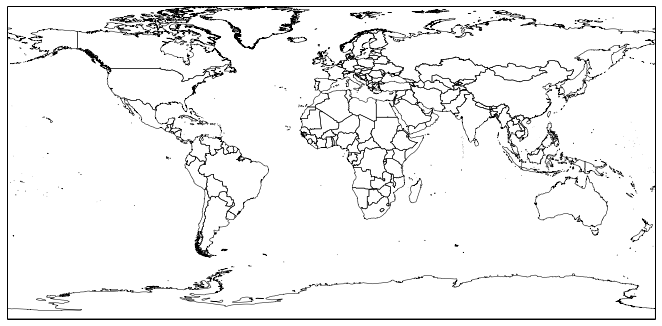

In [12]:
mydata='riv'
myfig='riv'
myproj='cyl'
mylabel='Indulgence                  vs                    Restraint'
size=(10,8)
cmap='Reds'
fig = plt.figure(figsize=size)#(11.7,8.3))
plt.subplots_adjust(left=0.01, right=0.91, top=0.99, bottom=0.01)
m = Basemap(projection=myproj,lon_0=0,llcrnrlat=ymin,urcrnrlat=ymax,llcrnrlon=xmin,urcrnrlon=xmax,lat_ts=20,resolution='c')
m.readshapefile(cntryshp[:-4],'myshape')
df=eval("data[['code','"+str(mydata)+"']]")
df=df.dropna()

In [13]:
def mymap(mydata,outfig,myproj='cyl',mylabel='',size=(5.85,4.15),labelpad=-30,cmap='YlOrBr'):
    # Import shape file with info
    fig = plt.figure(figsize=size)#(11.7,8.3))
    plt.subplots_adjust(left=0.01, right=0.91, top=0.99, bottom=0.01)
    m = Basemap(projection=myproj,lon_0=0,llcrnrlat=ymin,urcrnrlat=ymax,llcrnrlon=xmin,urcrnrlon=xmax,lat_ts=20,resolution='c')
    m.readshapefile(cntryshp[:-4],'myshape')
    df=eval("data[['code','"+str(mydata)+"']]")
    df=df.dropna()
    # Create CMP
    vmin=eval("df['"+str(mydata)+"'].min()")
    vmax=eval("df['"+str(mydata)+"'].max()")
    odedcmp = cm = plt.get_cmap(cmap) 
    cNorm  = colors.Normalize(vmin=vmin, vmax=vmax)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=odedcmp)
    myvar=[]
    patches=[]
    verts=[]
    for xy, info in zip(m.myshape, m.myshape_info):
        if info['ISO_3DIGIT']=='COD':
            info['ISO_3DIGIT']='ZAR'
        if info['ISO_3DIGIT']!='ATA':
            face=eval("df['"+str(mydata)+"'].ix[df.code==info['ISO_3DIGIT']].values")
            if face.shape[0]>0:
                myvar.append(face[0])
                verts.append(xy)
                # Choose a variable to color
                if face[0]!=np.nan:
                    poly = Polygon(xy, facecolor=scalarMap.to_rgba(face[0]),label=info['ISO_3DIGIT'], alpha=0.4)
                    #plt.gca().add_patch(poly)
                    patches.append(poly)
    mypolys=PatchCollection(patches, array=np.array(myvar), cmap=odedcmp, edgecolors='none')
    ax = plt.gca()
    ax.add_collection(mypolys)
    
    # create axes instance for colorbar on bottom. 
    pos = ax.get_position() 
    l, b, w, h = pos.bounds 
    cax = plt.axes([l+.4, b+0.32, .3, 0.01]) 
    # draw colorbar on bottom. 
    cbar=plt.colorbar(mypolys,cax=cax,orientation='horizontal',label=mylabel)
    cax.set_xlabel(mylabel,labelpad=labelpad,fontsize=10)
    plt.savefig(dir+'/maps/'+outfig+'.eps',dpi=150,bbox_inches='tight')
    plt.savefig(dir+'/maps/'+outfig+'.png',dpi=150,bbox_inches='tight')
    plt.show() 


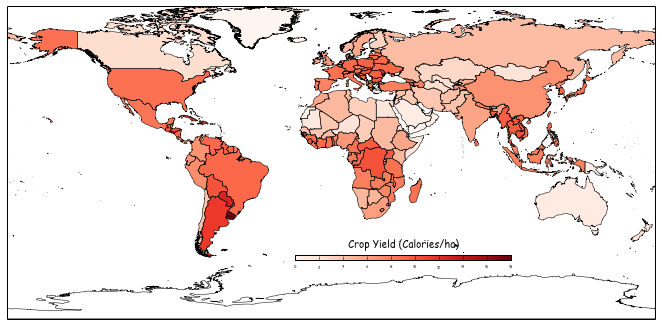

In [14]:
mymap('opten0lomean1500','opten0lomean1500',myproj='cyl',mylabel='Crop Yield (Calories/ha)',size=(10,8),cmap='Reds')